### Installing required packages and libraries

In [1]:
!apt-get update -qq
!apt-get install -y swig cmake ffmpeg xvfb

!pip install -U rl_zoo3 "stable-baselines3[extra]" gymnasium "gymnasium[box2d]" bluesky-gym pyvirtualdisplay imageio matplotlib pandas tensorboard moviepy

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
swig is already the newest version (4.0.2-1ubuntu1).
cmake is already the newest version (3.22.1-1ubuntu1.22.04.2).
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
xvfb is already the newest version (2:21.1.4-2ubuntu1.7~22.04.16).
0 upgraded, 0 newly installed, 0 to remove and 96 not upgraded.


### Importing required libraries

In [27]:
import os
import glob, re
import os, glob, re
import pandas as pd
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing import event_accumulator
from stable_baselines3 import PPO, DQN, SAC
import os, subprocess, time
from pyvirtualdisplay import Display
import gymnasium as gym
from gymnasium.wrappers import FlattenObservation
import numpy as np
from stable_baselines3.common.env_util import make_vec_env
#from google.colab import drive

### Setting required paths

In [2]:
# W przypadku checi korzystania z Google Drive trzeba zamienic project_root na snippet kodu ponizej:
#drive.mount('/content/drive')
#project_root = "/content/drive/MyDrive/irlproject"

project_root = "./irl"

logs_path = os.path.join(project_root, "logs")
os.makedirs(logs_path, exist_ok=True)

tb_path = os.path.join(project_root, "content/tb")
os.makedirs(tb_path, exist_ok=True)

out_vids_path = os.path.join(project_root, "content/videos")
os.makedirs(out_vids_path, exist_ok=True)

dqn_parameters_path = os.path.join(project_root, "dqn_parameters.yml")
ppo_parameters_path = os.path.join(project_root, "ppo_parameters.yml")
sac_parameters_path = os.path.join(project_root, "sac_parameters.yml")

print("logs_path:", logs_path)
print("dqn_parameters_path:", dqn_parameters_path)
print("ppo_parameters_path:", ppo_parameters_path)
print("sac_parameters_path:", sac_parameters_path)
print("tb_path:", tb_path)
print("out_vids_path:", out_vids_path)

logs_path: ./irl/logs
dqn_parameters_path: ./irl/dqn_parameters.yml
ppo_parameters_path: ./irl/ppo_parameters.yml
sac_parameters_path: ./irl/sac_parameters.yml
tb_path: ./irl/content/tb
out_vids_path: ./irl/content/videos


### Bluesky env setup

In [3]:
%%writefile import_bluesky_gym.py
import bluesky_gym
bluesky_gym.register_envs()

Overwriting import_bluesky_gym.py


### Training/eval steps save/eval freq & seed setup

In [4]:
SAVE_FREQ = 25_000
EVAL_FREQ = 25_000
SEED = 1

### DQN LunarLander-v3 training

In [6]:
%%time
!python -m rl_zoo3.train --algo dqn --env LunarLander-v3 \
  -f "{logs_path}" -c "{dqn_parameters_path}" --seed {SEED} \
  --save-freq {SAVE_FREQ} --eval-freq {EVAL_FREQ} --eval-episodes 5 --tensorboard-log "{tb_path}"

========== LunarLander-v3 ==========
Seed: 1
Loading hyperparameters from: ./irl/dqn_parameters.yml
Default hyperparameters for environment (ones being tuned will be overridden):
OrderedDict([('batch_size', 256),
             ('buffer_size', 200000),
             ('exploration_final_eps', 0.05),
             ('exploration_fraction', 0.2),
             ('gradient_steps', 1),
             ('learning_rate', 0.001),
             ('learning_starts', 10000),
             ('n_envs', 1),
             ('n_timesteps', 500000),
             ('policy', 'MlpPolicy'),
             ('policy_kwargs', 'dict(net_arch=[256, 256])'),
             ('target_update_interval', 1000),
             ('train_freq', 4)])
Using 1 environments
Creating test environment
Using cpu device
Log path: ./irl/logs/dqn/LunarLander-v3_1
Logging to ./irl/content/tb/LunarLander-v3/DQN_1
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 82.5     |
|    ep_rew_mean      | -159     |
|  

### PPO LunarLander-v3 training

In [7]:
%%time
!python -m rl_zoo3.train --algo ppo --env LunarLander-v3 \
  -f "{logs_path}" -c "{ppo_parameters_path}" --seed {SEED} \
  --save-freq {SAVE_FREQ} --eval-freq {EVAL_FREQ} --eval-episodes 5 --tensorboard-log "{tb_path}"

========== LunarLander-v3 ==========
Seed: 1
Loading hyperparameters from: ./irl/ppo_parameters.yml
Default hyperparameters for environment (ones being tuned will be overridden):
OrderedDict([('batch_size', 1024),
             ('clip_range', 0.2),
             ('ent_coef', 0.0),
             ('gae_lambda', 0.95),
             ('gamma', 0.99),
             ('learning_rate', 0.0003),
             ('n_envs', 8),
             ('n_epochs', 10),
             ('n_steps', 1024),
             ('n_timesteps', 500000),
             ('policy', 'MlpPolicy'),
             ('policy_kwargs', 'dict(net_arch=[256, 256])')])
Using 8 environments
Creating test environment
Using cpu device
Log path: ./irl/logs/ppo/LunarLander-v3_1
Logging to ./irl/content/tb/LunarLander-v3/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 92.3     |
|    ep_rew_mean     | -200     |
| time/              |          |
|    fps             | 9314     |
|    iterations      | 1   

### PPO SectorCREnv-v0 training

In [8]:
%%time
!python -m rl_zoo3.train --algo ppo --env SectorCREnv-v0 \
  -f "{logs_path}" -c "{ppo_parameters_path}" --seed {SEED} \
  --save-freq {SAVE_FREQ} \
  --gym-packages import_bluesky_gym

========== SectorCREnv-v0 ==========
Seed: 1
Loading hyperparameters from: ./irl/ppo_parameters.yml
Default hyperparameters for environment (ones being tuned will be overridden):
OrderedDict([('batch_size', 256),
             ('clip_range', 0.2),
             ('ent_coef', 0.01),
             ('env_wrapper', 'gymnasium.wrappers.FlattenObservation'),
             ('gae_lambda', 0.95),
             ('gamma', 0.995),
             ('learning_rate', 0.0003),
             ('n_envs', 1),
             ('n_epochs', 10),
             ('n_steps', 2048),
             ('n_timesteps', 100000),
             ('policy', 'MlpPolicy'),
             ('policy_kwargs', 'dict(net_arch=[256, 256])')])
Using 1 environments
Creating test environment
Using Python-based geo functions
Reading config from /root/bluesky/settings.cfg
Reading magnetic variation data
Loading global navigation database...
Reading cache: /root/bluesky/cache/navdata.p
Successfully loaded OpenAP performance model
Failed to load BADA perform

### SAC SectorCREnv-v0 training (experiment, as we can't use DQN here due to non-discrete env)

In [9]:
%%time
!python -m rl_zoo3.train --algo sac --env SectorCREnv-v0 \
  -f "{logs_path}" -c "{sac_parameters_path}" --seed {SEED} \
  --save-freq {SAVE_FREQ} \
  --gym-packages import_bluesky_gym


========== SectorCREnv-v0 ==========
Seed: 1
Loading hyperparameters from: ./irl/sac_parameters.yml
Default hyperparameters for environment (ones being tuned will be overridden):
OrderedDict([('batch_size', 256),
             ('buffer_size', 100000),
             ('ent_coef', 'auto'),
             ('env_wrapper', 'gymnasium.wrappers.FlattenObservation'),
             ('gamma', 0.99),
             ('gradient_steps', 1),
             ('learning_rate', 0.0003),
             ('learning_starts', 10000),
             ('n_timesteps', 100000),
             ('policy', 'MlpPolicy'),
             ('policy_kwargs', 'dict(net_arch=[256, 256])'),
             ('tau', 0.005),
             ('train_freq', 1)])
Using 1 environments
Creating test environment
Using Python-based geo functions
Reading config from /root/bluesky/settings.cfg
Reading magnetic variation data
Loading global navigation database...
Reading cache: /root/bluesky/cache/navdata.p
Successfully loaded OpenAP performance model
Failed to 

### Selecting last run of each model (requires re-run of previous training due to finetuning creating next runs!)

In [5]:
def latest_exp_id(algo: str, env_id: str) -> int:
    runs = glob.glob(os.path.join(logs_path, algo, f"{env_id}_*"))
    ids = []
    for r in runs:
        m = re.search(rf"{re.escape(env_id)}_(\d+)$", r)
        if m:
            ids.append(int(m.group(1)))
    return max(ids) if ids else 0

print("DQN Lunar exp-id:", latest_exp_id("dqn", "LunarLander-v3"))
print("PPO Lunar exp-id:", latest_exp_id("ppo", "LunarLander-v3"))
print("PPO Sector exp-id:", latest_exp_id("ppo", "SectorCREnv-v0"))
print("SAC Sector exp-id:", latest_exp_id("sac", "SectorCREnv-v0"))

DQN Lunar exp-id: 1
PPO Lunar exp-id: 1
PPO Sector exp-id: 1
SAC Sector exp-id: 1


### Rendering video of test DQN LunarLander-v3 run

In [11]:
EXP = latest_exp_id("dqn", "LunarLander-v3")

!python -m rl_zoo3.record_video --algo dqn --env LunarLander-v3 \
  -f "{logs_path}" --exp-id {EXP} -n 2000 -o "{out_vids_path}" --seed {SEED} --load-checkpoint 25000

!python -m rl_zoo3.record_video --algo dqn --env LunarLander-v3 \
  -f "{logs_path}" --exp-id {EXP} -n 2000 -o "{out_vids_path}" --seed {SEED} --load-checkpoint 50000

!python -m rl_zoo3.record_video --algo dqn --env LunarLander-v3 \
  -f "{logs_path}" --exp-id {EXP} -n 2000 -o "{out_vids_path}" --seed {SEED} --load-checkpoint 100000

!python -m rl_zoo3.record_video --algo ppo --env LunarLander-v3 \
  -f "{logs_path}" --exp-id {EXP} -n 2000 -o "{out_vids_path}" --seed {SEED} --load-checkpoint 500000

Loading ./irl/logs/dqn/LunarLander-v3_1/rl_model_25000_steps.zip
Loading ./irl/logs/dqn/LunarLander-v3_1/rl_model_25000_steps.zip
Saving video to /workspace/irl/content/videos/checkpoint-25000-dqn-LunarLander-v3-step-0-to-step-2000.mp4
MoviePy - Building video /workspace/irl/content/videos/checkpoint-25000-dqn-LunarLander-v3-step-0-to-step-2000.mp4.
MoviePy - Writing video /workspace/irl/content/videos/checkpoint-25000-dqn-LunarLander-v3-step-0-to-step-2000.mp4

MoviePy - Done !                                                                
MoviePy - video ready /workspace/irl/content/videos/checkpoint-25000-dqn-LunarLander-v3-step-0-to-step-2000.mp4
Loading ./irl/logs/dqn/LunarLander-v3_1/rl_model_50000_steps.zip
Loading ./irl/logs/dqn/LunarLander-v3_1/rl_model_50000_steps.zip
Saving video to /workspace/irl/content/videos/checkpoint-50000-dqn-LunarLander-v3-step-0-to-step-2000.mp4
MoviePy - Building video /workspace/irl/content/videos/checkpoint-50000-dqn-LunarLander-v3-step-0-to-ste

### Rendering video of test PPO LunarLander-v3 run

In [12]:
EXP = latest_exp_id("ppo", "LunarLander-v3")

!python -m rl_zoo3.record_video --algo ppo --env LunarLander-v3 \
  -f "{logs_path}" --exp-id {EXP} -n 2000 -o "{out_vids_path}" --seed {SEED} --load-checkpoint 50000

!python -m rl_zoo3.record_video --algo ppo --env LunarLander-v3 \
  -f "{logs_path}" --exp-id {EXP} -n 2000 -o "{out_vids_path}" --seed {SEED} --load-checkpoint 100000

!python -m rl_zoo3.record_video --algo ppo --env LunarLander-v3 \
  -f "{logs_path}" --exp-id {EXP} -n 2000 -o "{out_vids_path}" --seed {SEED} --load-checkpoint 500000

# !python -m rl_zoo3.record_video --algo ppo --env LunarLander-v3 \
#   -f "{logs_path}" --exp-id {EXP} -n 2000 -o "{out_vids_path}" --seed {SEED} --load-checkpoint 1000000

# !python -m rl_zoo3.record_video --algo ppo --env LunarLander-v3 \
#   -f "{logs_path}" --exp-id {EXP} -n 2000 -o "{out_vids_path}" --seed {SEED} --load-checkpoint 2000000


Loading ./irl/logs/ppo/LunarLander-v3_1/rl_model_50000_steps.zip
Loading ./irl/logs/ppo/LunarLander-v3_1/rl_model_50000_steps.zip
Saving video to /workspace/irl/content/videos/checkpoint-50000-ppo-LunarLander-v3-step-0-to-step-2000.mp4
MoviePy - Building video /workspace/irl/content/videos/checkpoint-50000-ppo-LunarLander-v3-step-0-to-step-2000.mp4.
MoviePy - Writing video /workspace/irl/content/videos/checkpoint-50000-ppo-LunarLander-v3-step-0-to-step-2000.mp4

MoviePy - Done !                                                                
MoviePy - video ready /workspace/irl/content/videos/checkpoint-50000-ppo-LunarLander-v3-step-0-to-step-2000.mp4
Loading ./irl/logs/ppo/LunarLander-v3_1/rl_model_100000_steps.zip
Loading ./irl/logs/ppo/LunarLander-v3_1/rl_model_100000_steps.zip
Saving video to /workspace/irl/content/videos/checkpoint-100000-ppo-LunarLander-v3-step-0-to-step-2000.mp4
MoviePy - Building video /workspace/irl/content/videos/checkpoint-100000-ppo-LunarLander-v3-step-0-to

### Rendering video of test SectorCREnv-v0 runs

It is a tricky part, as SectorCREnv-v0 does not expose ability to record test runs directly.
As far as I understand, it only exposes the human GUI.
That is why we created a virtual screen which runs it as the human GUI and records it (as a workaround to get the videos). 

In [6]:
def record_with_virtual_cam(model_class, model_path: str, out_mp4: str, steps: int = 2000, W: int = 1280, H: int = 720, FPS: int = 30):
    os.makedirs(os.path.dirname(out_mp4), exist_ok=True)
    display = Display(visible=0, size=(W, H))
    display.start()
    disp = os.environ["DISPLAY"]
    disp_in = disp + ".0" if "." not in disp else disp
    # ffmpeg screen capture settings
    ffmpeg_cmd = [
        "ffmpeg", "-y",
        "-video_size", f"{W}x{H}",
        "-framerate", str(FPS),
        "-f", "x11grab",
        "-i", f"{disp_in}+0,0",
        "-c:v", "libx264",
        "-preset", "ultrafast",
        "-tune", "zerolatency",
        "-pix_fmt", "yuv420p",
        out_mp4,
    ]
    rec = subprocess.Popen(ffmpeg_cmd, stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
    time.sleep(1)

    # env setup for the run
    import bluesky_gym
    bluesky_gym.register_envs()
    env = gym.make("SectorCREnv-v0", render_mode="human")
    env = gym.wrappers.FlattenObservation(env)

    # using cuda to make the runs and recording faster (using gpu codec for recoring to prevent lags on cpu)
    device = "cuda"
    model = model_class.load(model_path, device=device)

    obs, info = env.reset()
    for _ in range(steps):
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, terminated, truncated, info = env.step(action)
        if terminated or truncated:
            obs, info = env.reset()
    env.close()

    # stop recording
    rec.terminate()
    rec.wait(timeout=10)
    display.stop()

    return out_mp4

### Helper function for finding run dir

In [7]:
def find_run_dir(algo: str, env_id: str, exp_id: int) -> str:
    return os.path.join(logs_path, algo, f"{env_id}_{exp_id}")

### Rendering video of test PPO SectorCREnv-v0 run

Side note:
Running this code is very GPU VRAM heavy. It might crash the kernel. If it does, please limit the steps.

In [15]:
exp = latest_exp_id("ppo", "SectorCREnv-v0")
run_dir = find_run_dir("ppo", "SectorCREnv-v0", exp)
final_zip = os.path.join(run_dir, "best_model.zip")

recording_path = os.path.join(out_vids_path, "sector_ppo_final.mp4")

record_with_virtual_cam(PPO, final_zip, recording_path, steps=200)

Using Python-based geo functions
Reading config from /root/bluesky/settings.cfg
Reading magnetic variation data
Loading global navigation database...
Reading cache: /root/bluesky/cache/navdata.p
Successfully loaded OpenAP performance model
Failed to load BADA performance model
Successfully loaded legacy performance model
Successfully loaded plugin AREA
Successfully loaded plugin DATAFEED


ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default


'./irl/content/videos/sector_ppo_final.mp4'

### Rendering video of test SAC (experiment) SectorCREnv-v0 run

Side note:
Running this code is very GPU VRAM heavy. It might crash the kernel. If it does, please limit the steps.

In [8]:
exp = latest_exp_id("sac", "SectorCREnv-v0")
run_dir = find_run_dir("sac", "SectorCREnv-v0", exp)
final_zip = os.path.join(run_dir, "best_model.zip")

recording_path = os.path.join(out_vids_path, "sector_sac_final.mp4")

record_with_virtual_cam(SAC, final_zip, recording_path, steps=200)

Using Python-based geo functions
Reading config from /root/bluesky/settings.cfg
Reading magnetic variation data
Loading global navigation database...
Reading cache: /root/bluesky/cache/navdata.p
Successfully loaded OpenAP performance model
Failed to load BADA performance model
Successfully loaded legacy performance model
Successfully loaded plugin AREA
Successfully loaded plugin DATAFEED


ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default


'./irl/content/videos/sector_sac_final.mp4'

### Helper functions for findings latest run logs to visualize training in charts

In [23]:
def latest_run_dir_logs(algo, env_id):
    cands = glob.glob(os.path.join(logs_path, algo, f"{env_id}_*"))
    rid = lambda p: int(re.search(rf"{re.escape(env_id)}_(\d+)$", p).group(1))
    return max(cands, key=rid)

def load_monitor_df(run_dir):
    mon = next(iter(glob.glob(os.path.join(run_dir, "**", "*.monitor.csv"), recursive=True)), None)
    df = pd.read_csv(mon, skiprows=1)
    df["timesteps"] = df["l"].cumsum()
    df["r_ma20"] = df["r"].rolling(20, min_periods=1).mean()
    df["r_ma50"] = df["r"].rolling(50, min_periods=1).mean()
    return df

### Creating charts to visualize training progress for both envs

Models: DQN, PPO for LunarLander and SAC, PPO for SectorCRenv

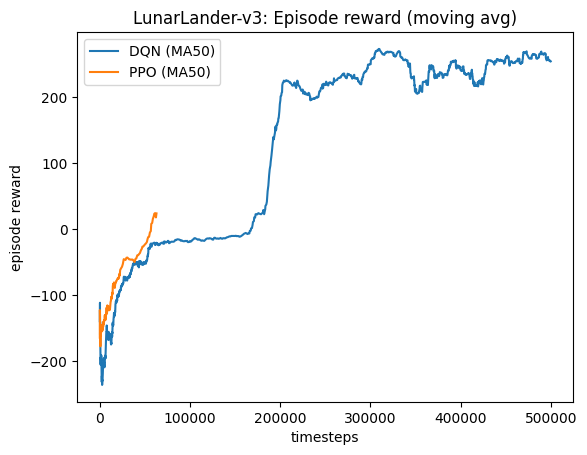

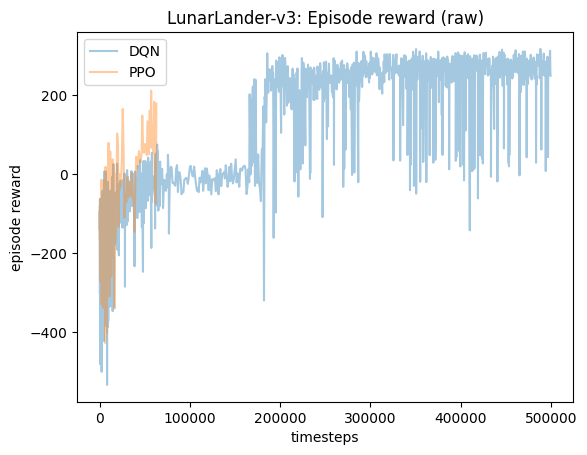

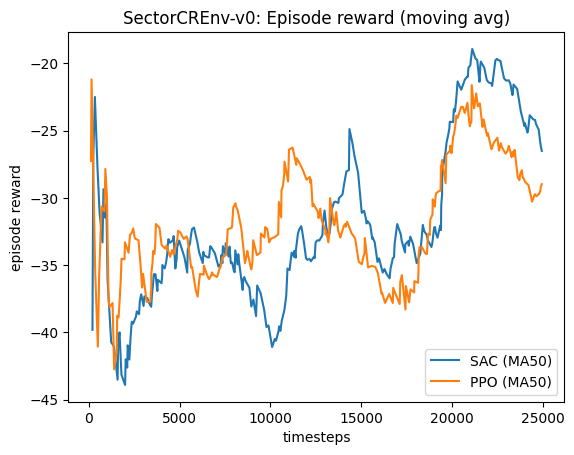

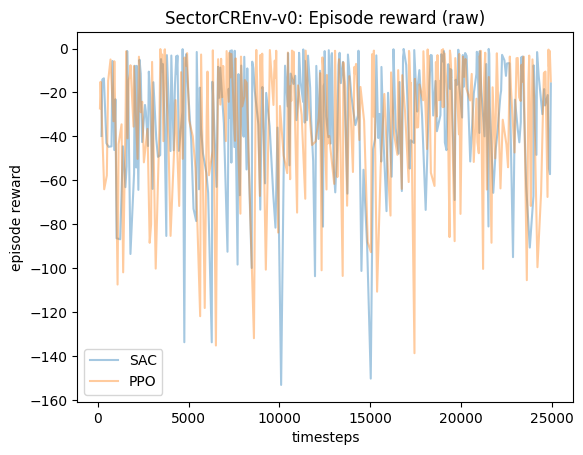

In [24]:
# LunarLander
ENV_ID = "LunarLander-v3"

df_dqn = load_monitor_df(latest_run_dir_logs("dqn", ENV_ID))
df_ppo = load_monitor_df(latest_run_dir_logs("ppo", ENV_ID))

plt.figure()
plt.plot(df_dqn["timesteps"], df_dqn["r_ma50"], label="DQN (MA50)")
plt.plot(df_ppo["timesteps"], df_ppo["r_ma50"], label="PPO (MA50)")
plt.title(f"{ENV_ID}: Episode reward (moving avg)")
plt.xlabel("timesteps")
plt.ylabel("episode reward")
plt.legend()
plt.show()

plt.figure()
plt.plot(df_dqn["timesteps"], df_dqn["r"], alpha=0.4, label="DQN")
plt.plot(df_ppo["timesteps"], df_ppo["r"], alpha=0.4, label="PPO")
plt.title(f"{ENV_ID}: Episode reward (raw)")
plt.xlabel("timesteps")
plt.ylabel("episode reward")
plt.legend()
plt.show()

# SectorCREnv
ENV_ID = "SectorCREnv-v0"

run_sac = latest_run_dir_logs("sac", ENV_ID)
run_ppo = latest_run_dir_logs("ppo", ENV_ID)

df_sac = load_monitor_df(run_sac)
df_ppo = load_monitor_df(run_ppo)

plt.figure()
plt.plot(df_sac["timesteps"], df_sac["r_ma50"], label="SAC (MA50)")
plt.plot(df_ppo["timesteps"], df_ppo["r_ma50"], label="PPO (MA50)")
plt.title(f"{ENV_ID}: Episode reward (moving avg)")
plt.xlabel("timesteps")
plt.ylabel("episode reward")
plt.legend()
plt.show()

plt.figure()
plt.plot(df_sac["timesteps"], df_sac["r"], alpha=0.4, label="SAC")
plt.plot(df_ppo["timesteps"], df_ppo["r"], alpha=0.4, label="PPO")
plt.title(f"{ENV_ID}: Episode reward (raw)")
plt.xlabel("timesteps")
plt.ylabel("episode reward")
plt.legend()
plt.show()

### Results evaluation

Total steps for evaluation: 20k

In LunarLander we are comparing DQN vs PPO
In SectorCREnv we are comparing PPO vs SAC

For LunarLander, DQN has average higer result for best model. DQN is also more stable than PPO in this case, as shown on the chart below.

For SectorCREnv, both PPO and SAC have equaly bad result (avg ~ -25), most likely due to insufficient amount of timesteps. 
We believe it would require more powerful GPU with coniniuous access to test them out properly

In [ ]:
N_STEPS = 20000

def get_model_path(algo: str, env_id: str) -> str:
    exp_id = latest_exp_id(algo, env_id)
    run_dir = os.path.join(logs_path, algo, f"{env_id}_{exp_id}")
    p = os.path.join(run_dir, "best_model.zip")
    if os.path.exists(p):
        return p
    return ""

def eval_stream(env_id, model_cls, model_path):
    env = gym.make(env_id)
    if env_id == "SectorCREnv-v0":
        env = FlattenObservation(env)

    model = model_cls.load(model_path)

    obs, _ = env.reset(seed=SEED)
    ret, rets = 0.0, []
    t, ts = 0, []

    for _ in range(N_STEPS):
        a, _ = model.predict(obs, deterministic=True)
        obs, r, term, trunc, _ = env.step(a)
        t += 1
        ret += float(r)
        if term or trunc:
            rets.append(ret)
            ts.append(t)
            ret = 0.0
            obs, _ = env.reset()

    env.close()
    rets = np.array(rets, float)
    ts = np.array(ts, int)
    print(env_id, 
          model_cls.__name__, 
          "episodes=", len(rets),
          "mean=", float(rets.mean()))
    return ts, rets

# LunarLander: DQN + PPO
plt.figure()
for algo, cls in [("dqn", DQN), ("ppo", PPO)]:
    p = get_model_path(algo, "LunarLander-v3")
    ts, rets = eval_stream("LunarLander-v3", cls, p)
    if len(rets): 
        plt.plot(ts, rets, label=algo)

plt.title("LunarLander-v3")
plt.xlabel("timesteps")
plt.ylabel("return")
plt.grid(True)
plt.legend()

import bluesky_gym
bluesky_gym.register_envs()

# SectorCREnv: PPO + SAC
plt.figure()
for algo, cls in [("ppo", PPO), ("sac", SAC)]:
    p = get_model_path(algo, "SectorCREnv-v0")
    ts, rets = eval_stream("SectorCREnv-v0", cls, p)
    if len(rets): 
        plt.plot(ts, rets, label=algo)

plt.title("SectorCREnv-v0")
plt.xlabel("timesteps")
plt.ylabel("return")
plt.grid(True)
plt.legend()

plt.show()

### Finetuning for LunarLander PPO

We experimented with finetuning parameters for LunarLander PPO with limited steps due to GPU constraints.

For now there are only 4 configurations to choose from, but it can be easily expanded with access to better GPU resources.

In [30]:
ENV_ID = "LunarLander-v3"
finetuning_path = os.path.join(project_root, "finetuning")
os.makedirs(finetuning_path, exist_ok=True)

TIMESTEPS = 100000
EVAL_STEPS = 20000

def eval_for_finetuning(model, env_id=ENV_ID, seed=SEED, n_steps=EVAL_STEPS):
    env = gym.make(env_id)
    obs, _ = env.reset(seed=seed)
    ret, rets = 0.0, []
    for _ in range(n_steps):
        a, _ = model.predict(obs, deterministic=True)
        obs, r, term, trunc, _ = env.step(a)
        ret += float(r)
        if term or trunc:
            rets.append(ret); ret = 0.0
            obs, _ = env.reset()
    env.close()
    rets = np.array(rets, float)
    return (float(rets.mean()) if len(rets) else -np.inf), rets

base_kwargs = dict(
    policy="MlpPolicy",
    n_steps=1024,
    batch_size=1024,
    n_epochs=10,
    gamma=0.99,
    gae_lambda=0.95,
    ent_coef=0.0,
    policy_kwargs=dict(net_arch=[256, 256]),
    verbose=0,
    seed=SEED,
)

grid = [
    dict(learning_rate=3e-4, clip_range=0.2),
    dict(learning_rate=1e-4, clip_range=0.2),
    dict(learning_rate=3e-4, clip_range=0.1),
    dict(learning_rate=1e-4, clip_range=0.1),
]

all_rets = []
best_mean, best_cfg, best_model = -np.inf, None, None

for i, cfg in enumerate(grid, 1):
    print(f"[{i}/{len(grid)}] cfg={cfg}")
    vec_env = make_vec_env(ENV_ID, n_envs=8, seed=SEED)
    model = PPO(env=vec_env, **base_kwargs, **cfg)
    model.learn(total_timesteps=TIMESTEPS)
    vec_env.close()

    mean, rets = eval_for_finetuning(model)
    all_rets.append((cfg, rets))
    print(f"[{i}/{len(grid)}] mean_return={mean}")

    if mean > best_mean:
        best_mean, best_cfg, best_model = mean, cfg, model
        print(f"[{i}/{len(grid)}] NEW BEST {best_cfg} mean_return={best_mean}")

print(f"BEST {best_cfg} with mean_return {best_mean}")

[1/4] cfg={'learning_rate': 0.0003, 'clip_range': 0.2}
[1/4] mean_return=-749.1718974591807
[1/4] NEW BEST {'learning_rate': 0.0003, 'clip_range': 0.2} mean_return=-749.1718974591807
[2/4] cfg={'learning_rate': 0.0001, 'clip_range': 0.2}
[2/4] mean_return=-1716.897915284216
[3/4] cfg={'learning_rate': 0.0003, 'clip_range': 0.1}
[3/4] mean_return=-922.9556683988653
[4/4] cfg={'learning_rate': 0.0001, 'clip_range': 0.1}
[4/4] mean_return=-1412.8933975515588
BEST {'learning_rate': 0.0003, 'clip_range': 0.2} with mean_return -749.1718974591807


### Creating chart to visualize finetuning results

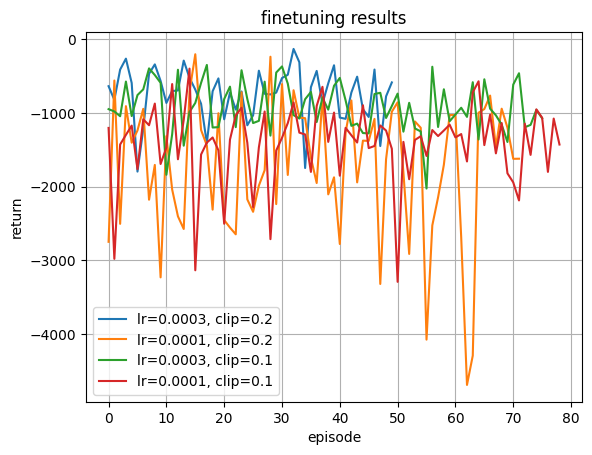

In [32]:
plt.figure()
for cfg, rets in all_rets:
    plt.plot(rets, label=f"lr={cfg['learning_rate']}, clip={cfg['clip_range']}")
plt.title("finetuning results")
plt.xlabel("episode")
plt.ylabel("return")
plt.grid(True)
plt.legend()
plt.show()